In [2]:
import sympy as sm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [3]:
def RCP (t, u, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1): 
    
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
    du[3] = 1
    
    du = du.reshape(4,)
    return(du)

In [4]:
rv = np.arange(0.5, 6.1, 1)
aCv = np.arange(0.05, 0.81, 0.2)
eCv = np.arange(0.05, 0.81, 0.2)
mCv = np.arange(0.05, 0.91, 0.2)
hCv = np.arange(0.1, 0.81, 0.2)
aPv = np.arange(0.05, 0.81, 0.2)
ePv = np.arange(0.05, 0.81, 0.2)
mPv = np.arange(0.05, 0.91, 0.2)
hPv = np.arange(0.1, 0.81, 0.2)

import itertools as itr
import pandas as pd

par = list(itr.product(rv,aCv,eCv,mCv,hCv,aPv,ePv,mPv,hPv))
pardf = pd.DataFrame(par,columns=("r","aC","eC","mC","hC","aP","eP","mP","hP"))


In [5]:
i= 231002

r0 = par[i][0]; q0 = (1/30000)
aC0 = par[i][1]; eC0 = par[i][2]; mC0 = par[i][3]; hC0 = par[i][4]
aP0 = par[i][5]; eP0 = par[i][6]; mP0 = par[i][7]; hP0 = par[i][8]

u0 = np.array([8000, 900, 30, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
p

(2.5,
 3.3333333333333335e-05,
 0.25,
 0.05,
 0.30000000000000004,
 0.05,
 0.6500000000000001,
 0.45,
 0.05,
 0.5000000000000001)

In [10]:
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)

In [11]:
start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-14, atol=1e-14)
print(timeit.default_timer() - start_time)

5.34594210004434


In [12]:
ssv = sl2.y[:,5000:]
np.shape(ssv)

(4, 995000)

In [13]:
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

<IPython.core.display.Javascript object>


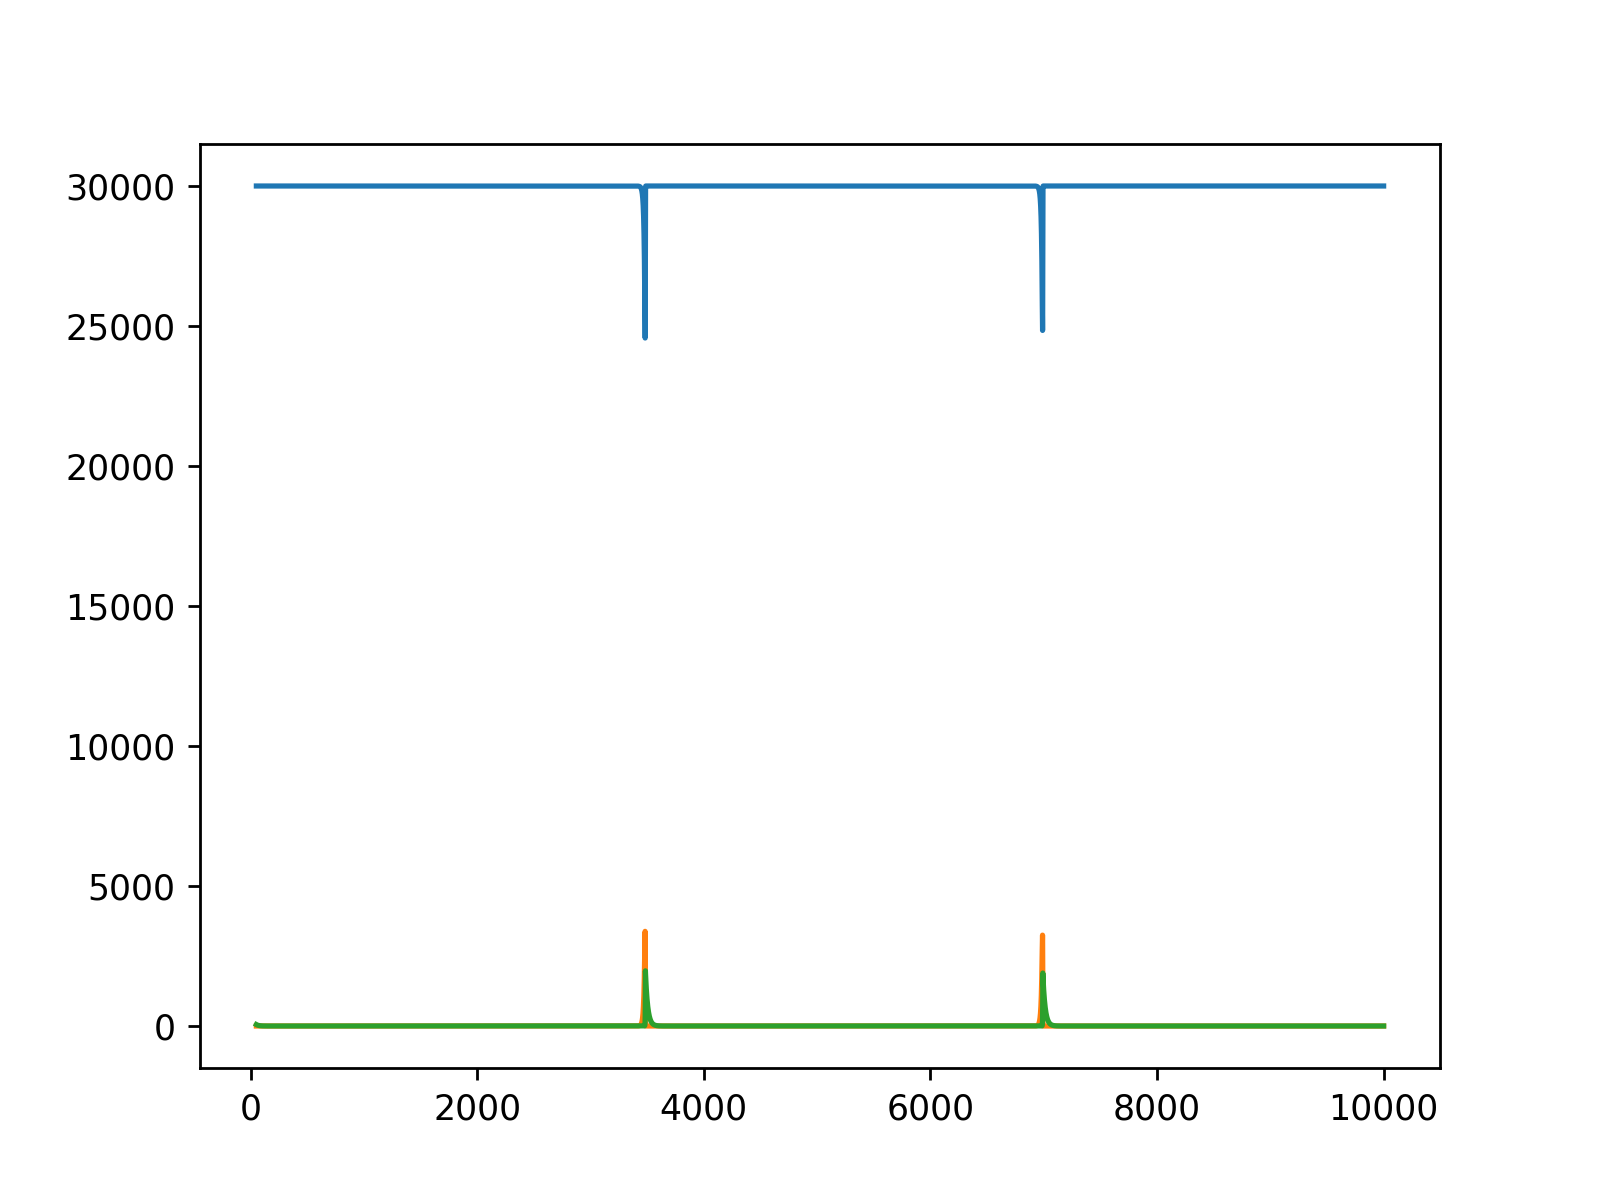

In [14]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

<IPython.core.display.Javascript object>


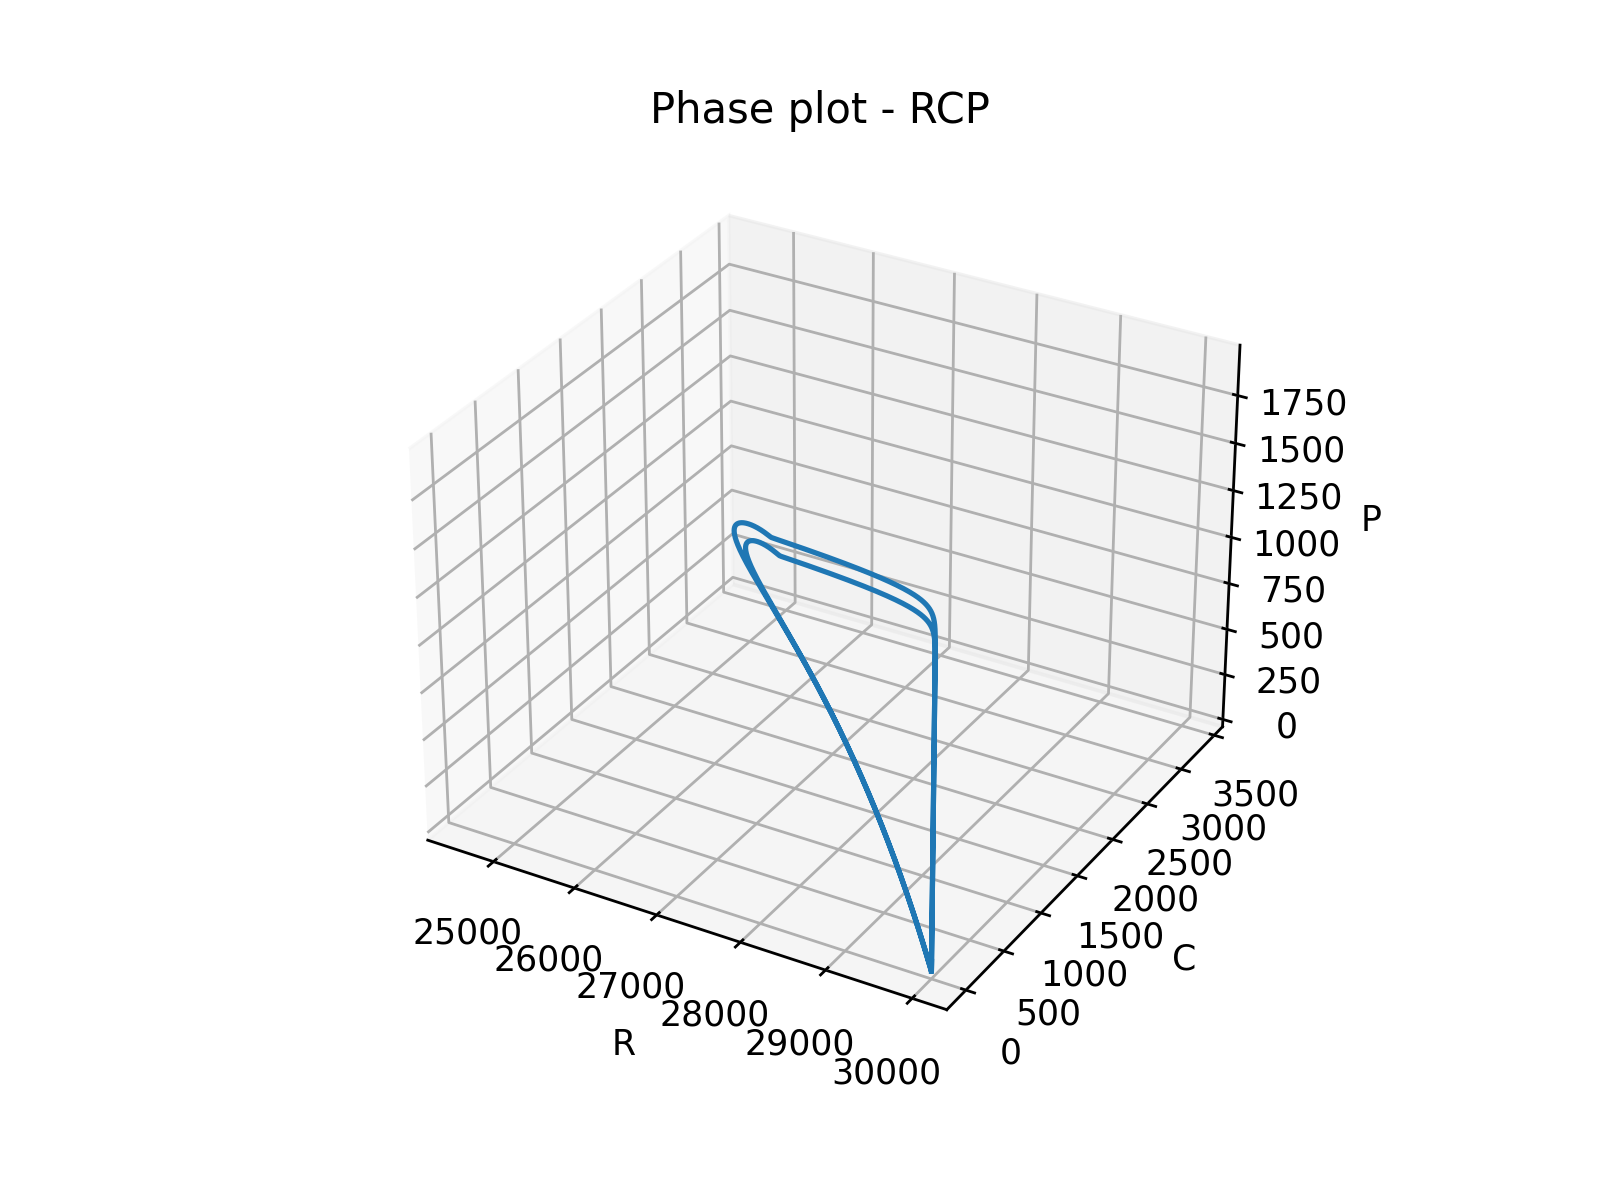

Text(0.5, 0, 'P')

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.set_title("Phase plot - RCP")
ax.set_xlabel("R"); ax.set_ylabel("C"); ax.set_zlabel("P")

<IPython.core.display.Javascript object>


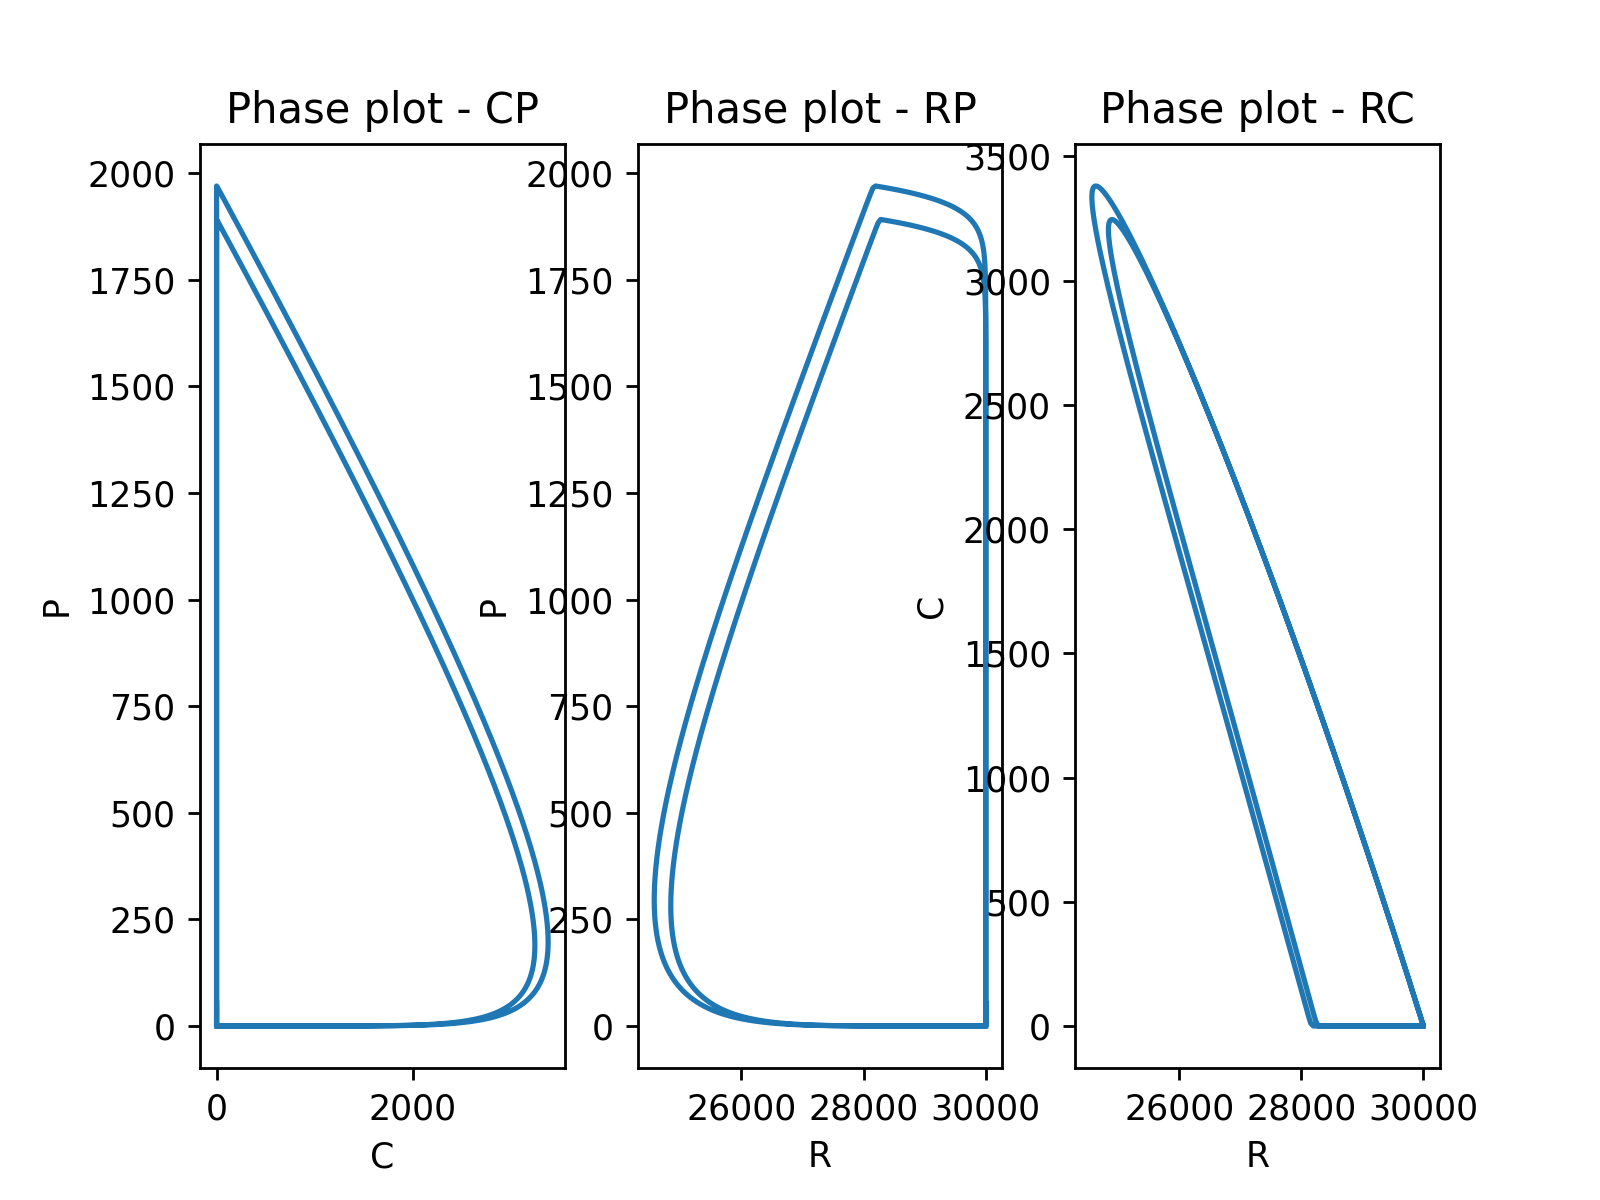

Text(0, 0.5, 'C')

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,3,1)
ax.plot(C, P)
ax.set_title("Phase plot - CP")
ax.set_xlabel("C"); ax.set_ylabel("P")


ax = fig.add_subplot(1,3,2)
ax.plot(R, P)
ax.set_title("Phase plot - RP")
ax.set_xlabel("R"); ax.set_ylabel("P")

ax = fig.add_subplot(1,3,3)
ax.plot(R, C)
ax.set_title("Phase plot - RC")
ax.set_xlabel("R"); ax.set_ylabel("C")

**Case 2b**

In [45]:
r0 = 2.5; q0 = (1/10000)
aC0 = 0.30; eC0 = 0.16; mC0 = 0.2; hC0 = 0.25
aP0 = 0.35; eP0 = 0.4; mP0 = 0.025; hP0 = 0.15

u0 = np.array([8000, 900, 30, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
p

(2.5, 0.0001, 0.3, 0.16, 0.25, 0.2, 0.35, 0.4, 0.025, 0.15)

In [46]:
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*10)

In [47]:
start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-14, atol=1e-14)
print(timeit.default_timer() - start_time)

12.181263300124556


In [48]:
ssv = sl2.y[:,500:]
np.shape(ssv)

(4, 99500)

In [49]:
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

<IPython.core.display.Javascript object>


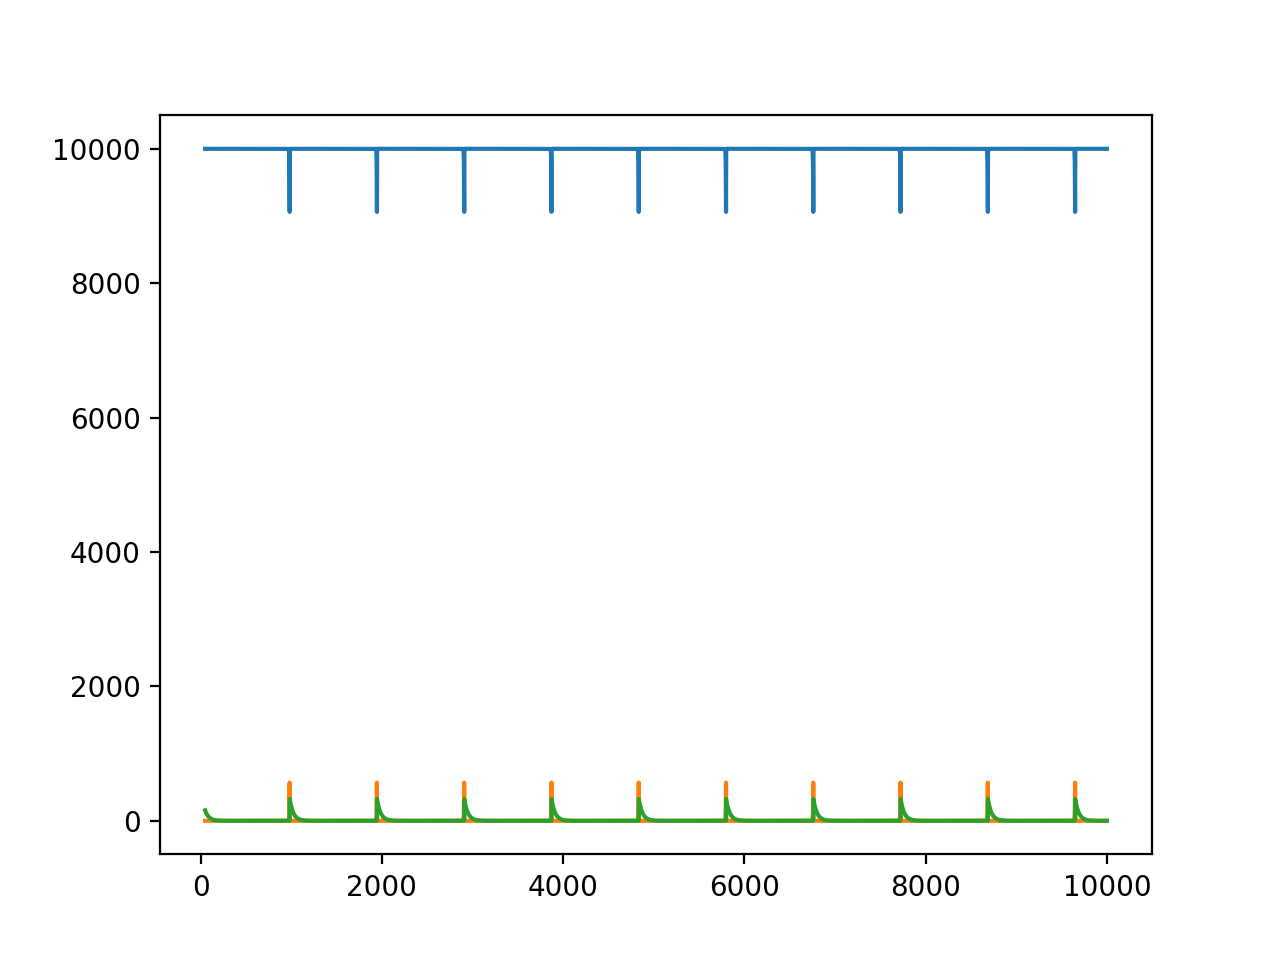

In [50]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

<IPython.core.display.Javascript object>


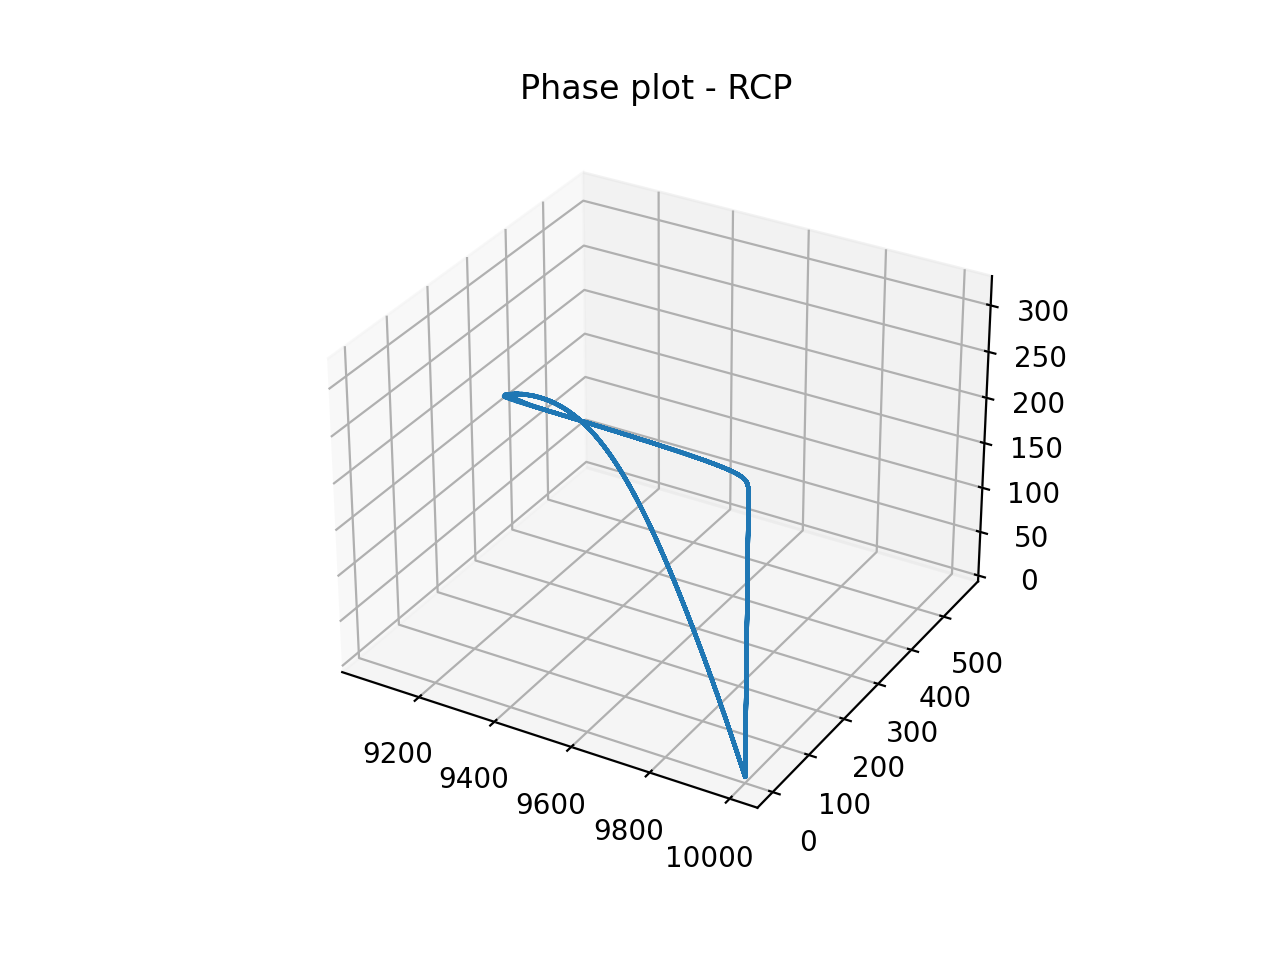

Text(0.5, 0.92, 'Phase plot - RCP')

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.set_title("Phase plot - RCP")

<IPython.core.display.Javascript object>


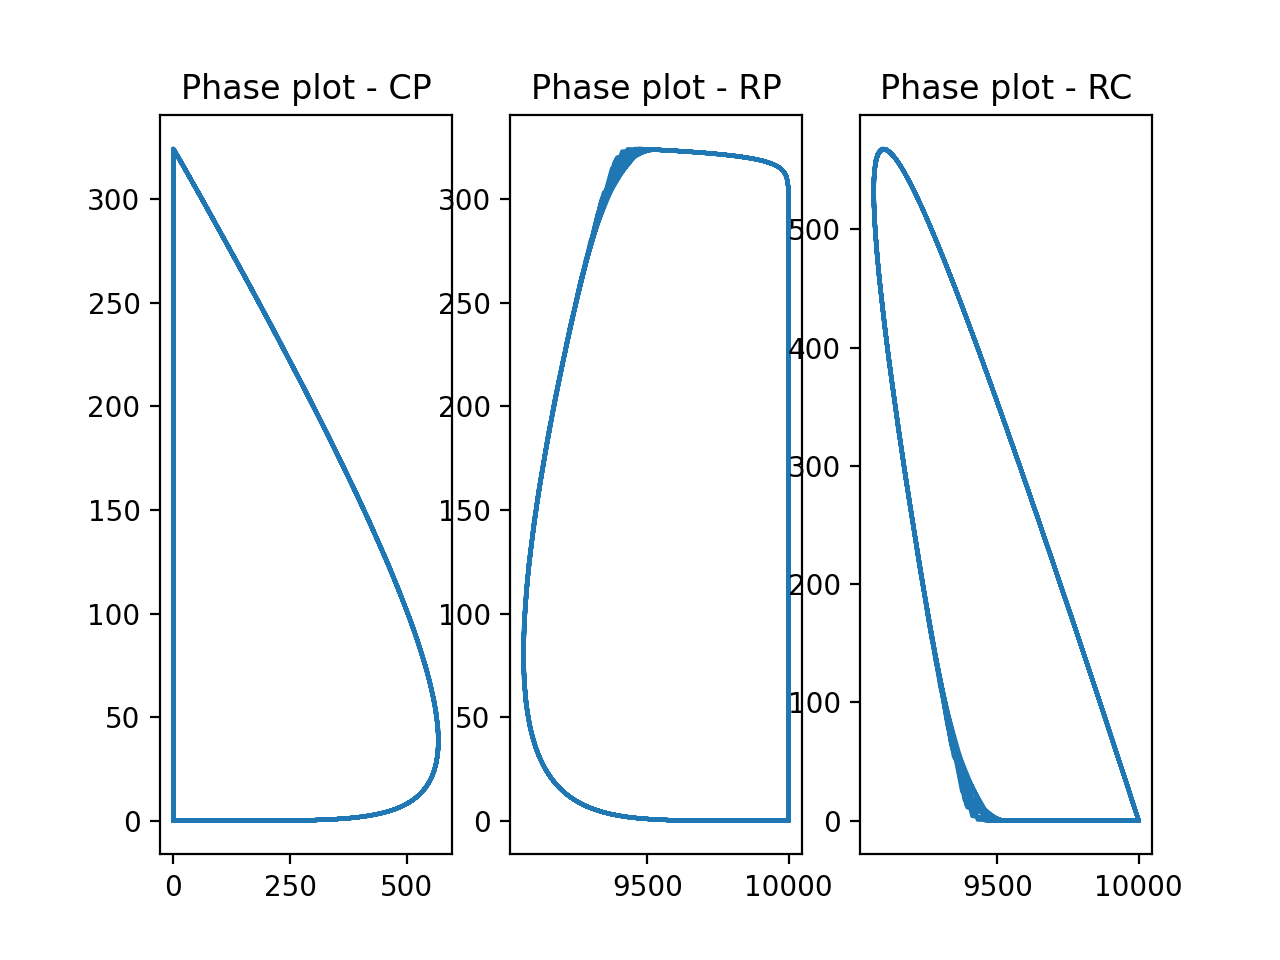

Text(0.5, 1.0, 'Phase plot - RC')

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,3,1)
ax.plot(C, P)
ax.set_title("Phase plot - CP")

ax = fig.add_subplot(1,3,2)
ax.plot(R, P)
ax.set_title("Phase plot - RP")

ax = fig.add_subplot(1,3,3)
ax.plot(R, C)
ax.set_title("Phase plot - RC")

In [1]:
58700*12


704400